d:\py\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20687 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\p

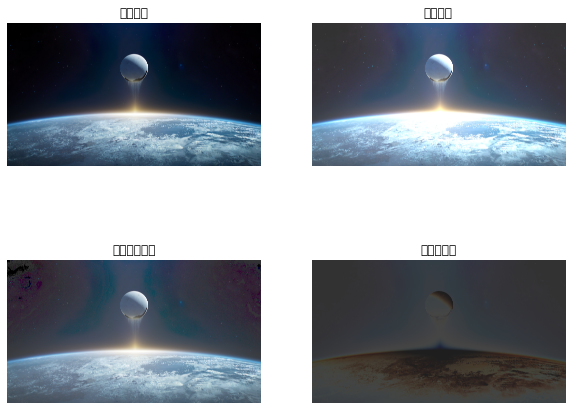

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# 定义线性函数
def linear(x, a, b):
    return a * x + b

# 定义分段线性函数
def piecewise(x, a, b, c, d, e, f):
    x = x.astype(float)
    result = np.zeros_like(x)

    mask1 = x <= a
    mask2 = (x > a) & (x <= b)
    mask3 = (x > b)

    result[mask1] = d * x[mask1] + e
    result[mask2] = a * x[mask2] + (e - a * b) 
    result[mask3] = c * x[mask3] + f

    return result

# 定义非线性函数
def nonlinear(x, a, b, c):
    return a * np.sin(b * x) + c


# 打开图片
img = Image.open("test.jpg")

# 获取图片的像素矩阵
img_array = np.array(img)

# 应用线性函数进行运算
linear_array = linear(img_array, 1.2, 50)
linear_array = np.clip(linear_array, 0, 255).astype(np.uint8)
linear_img = Image.fromarray(linear_array)

# 应用分段线性函数进行运算
piecewise_array = piecewise(img_array, 0.3, 0.6, 0.8, 0.5, 1.2, 50)
piecewise_array = np.clip(piecewise_array, 0, 255).astype(np.uint8)
piecewise_img = Image.fromarray(piecewise_array)

# 应用非线性函数进行运算
nonlinear_array = nonlinear(img_array, 20, 0.02, 50)
nonlinear_array = np.clip(nonlinear_array, 0, 255).astype(np.uint8)
nonlinear_img = Image.fromarray(nonlinear_array)

# 显示图片
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(10, 8)

axs[0, 0].imshow(img)
axs[0, 0].set_title('原始图像')

axs[0, 1].imshow(linear_img)
axs[0, 1].set_title('线性函数')

axs[1, 0].imshow(piecewise_img)
axs[1, 0].set_title('分段线性函数')

axs[1, 1].imshow(nonlinear_img)
axs[1, 1].set_title('非线性函数')

for ax in axs.flatten():
    ax.axis('off')

plt.show()